<a href="https://colab.research.google.com/github/csabiu/ML_tutorial/blob/master/DT_photoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Regression problem

In this notebook we will use decision tree and random forests algorihtms to learn a mapping between galaxy magnitudes and colors and the spectroscopic redshift.

We will construct some learning curves to determine the best choices of the algorihtms.

We will then use feature importance to understand which of the features give us the most predictive power, and then train a very simiple algorithm with reduced feature list.


# Load some libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn.model_selection import train_test_split
!pip install gdown

# Doanload the dataset

In [2]:
import gdown
!gdown https://drive.google.com/uc?id=1Wdy5-wnVFaRK-Xx3j4osQsMDoA6O9VeB

Downloading...
From: https://drive.google.com/uc?id=1Wdy5-wnVFaRK-Xx3j4osQsMDoA6O9VeB
To: /content/SpecPhotodr14_hoyleb.csv.sampled.fits.bz2
100% 244M/244M [00:06<00:00, 36.5MB/s]


# Clean the data

In [3]:
d = Table.read('SpecPhotodr14_hoyleb.csv.sampled.fits.bz2')
# will perform a bit of data cleaning.
d = d[d['SPEC_Z'] < 1.0]
d = d[d['SPEC_Z'] > 1e-3]

In [4]:
#you can look at the all the features available to you
# http://skyserver.sdss.org/dr14/en/help/browser/browser.aspx#&&history=description+PhotoObj+V
print (d.keys())

['OBJID', 'RA', 'DEC', 'PHOTPTYPE', 'PHOT_SG', 'FLAGS', 'SATURATED', 'BAD_COUNTS_ERROR', 'BINNED1', 'u', 'g', 'r', 'i', 'z', 'u_err', 'g_err', 'r_err', 'i_err', 'z_err', 'MODELMAGERR_U', 'MODELMAGERR_G', 'MODELMAGERR_R', 'MODELMAGERR_I', 'MODELMAGERR_Z', 'EXTINCTION_U', 'EXTINCTION_G', 'EXTINCTION_R', 'EXTINCTION_I', 'EXTINCTION_Z', 'DERED_U', 'DERED_G', 'DERED_R', 'DERED_I', 'DERED_Z', 'PETRORAD_U', 'PETRORAD_G', 'PETRORAD_R', 'PETRORAD_I', 'PETRORAD_Z', 'PETRORADERR_U', 'PETRORADERR_G', 'PETRORADERR_R', 'PETRORADERR_I', 'PETRORADERR_Z', 'DEVRAD_U', 'DEVRADERR_U', 'DEVRAD_G', 'DEVRADERR_G', 'DEVRAD_R', 'DEVRADERR_R', 'DEVRAD_I', 'DEVRADERR_I', 'DEVRAD_Z', 'DEVRADERR_Z', 'DEVAB_U', 'DEVAB_G', 'DEVAB_R', 'DEVAB_I', 'DEVAB_Z', 'CMODELMAG_U', 'CMODELMAGERR_U', 'CMODELMAG_G', 'CMODELMAGERR_G', 'CMODELMAG_R', 'CMODELMAGERR_R', 'CMODELMAG_I', 'CMODELMAGERR_I', 'CMODELMAG_Z', 'CMODELMAGERR_Z', 'PSFMAG_U', 'PSFMAGERR_U', 'PSFMAG_G', 'PSFMAGERR_G', 'PSFMAG_R', 'PSFMAGERR_R', 'PSFMAG_I', 'PSFMAG

In [5]:
# we will use just dereddend magnitudes 
mags = ['DERED_U', 'DERED_G', 'DERED_R','DERED_I','DERED_Z']
d=d[d[mags[0]]!='null']
d=d[d[mags[1]]!='null']
d=d[d[mags[2]]!='null']
d=d[d[mags[3]]!='null']
d=d[d[mags[4]]!='null']

def f(x):
    return np.float(x)
f2 = np.vectorize(f)

#and color combinations created from them.
cols= []
for i in range(len(mags)-1):
    for j in range(i, len(mags)):
        cols.append(mags[i]+'-' + mags[j])

# let's load these into an input array
inputs = np.zeros((len(d), len(mags+cols)), dtype=float)
for i, key in enumerate(mags):
    inputs[:, i] = np.array(d[key])

cnt = len(mags)
for i in range(len(mags)-1):
    for j in range(i, len(mags)):
        inputs[:, cnt] = np.array(f2(d[mags[i]])) - np.array(f2(d[mags[j]]))
        cnt += 1


# for photo-z work
# The target/label values are spectroscopic redshifts

In [6]:
targets = np.array(f2(d['SPEC_Z']))

# we will split the data into a trainind and testing sample.


In [11]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

print("Training inputs: ",x_train.shape)
print("Training outputs: ",y_train.shape)
print("Testing inputs: ",x_test.shape)
print("Testing outputs: ",y_test.shape)

Training inputs:  (222856, 19)
Training outputs:  (222856,)
Testing inputs:  (55714, 19)
Testing outputs:  (55714,)


In [12]:
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
    
#see https://scikit-learn.org/stable/modules/tree.html

#help(DT)

#let's train [.fit()]  a tree on the training sample, and then make predictions on the test sample

No handles with labels found to put in legend.


0.01632998820426346 0.016298838836165553


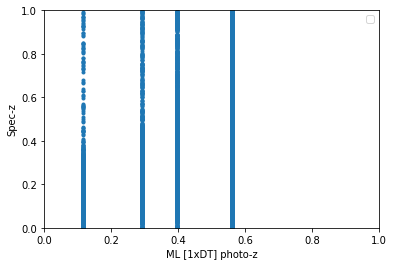

In [14]:
clf = DT(random_state=0, max_depth=2)
clf = clf.fit(x_train, y_train)

pred_train  = clf.predict(x_train)
pred_test = clf.predict(x_test)

mse_test = mean_squared_error(y_test, pred_test)
mse_train = mean_squared_error(y_train, pred_train)
plt.plot(pred_test,y_test, '.')#, label='test MSE={:0.2f}'.format(mse_test))
plt.legend()
plt.xlabel('ML [1xDT] photo-z')
plt.ylabel('Spec-z')
plt.xlim([0,1])
plt.ylim([0,1])

print(mse_test, mse_train)


# Show graph

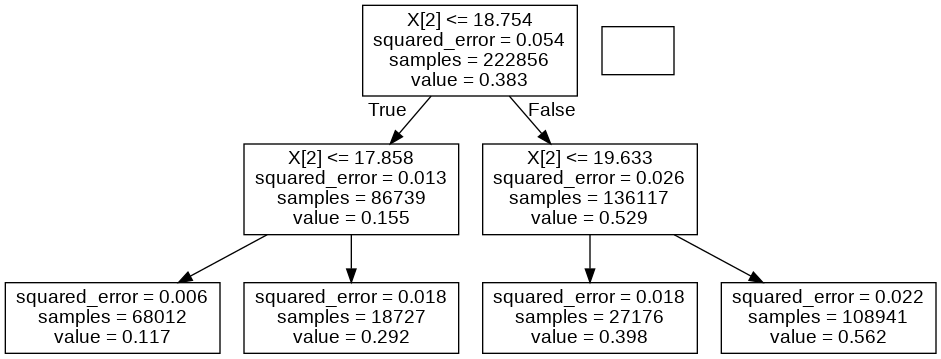

In [16]:
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data=export_graphviz(clf)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

# Lets increase the number of trees -> forest

In [17]:
#for regression [photo-z]
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

clf = RandomForestRegressor(max_depth=8,n_estimators=50)

0.008082865688991315 0.007492571467604752


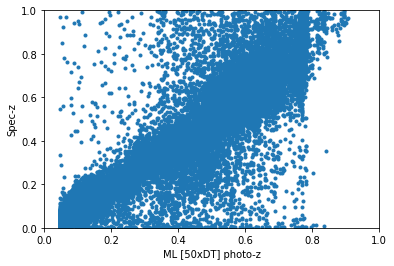

In [18]:
clf = clf.fit(x_train, y_train)

#replace None
pred_train  = clf.predict(x_train)
pred_test = clf.predict(x_test)

mse_test = mean_squared_error(y_test, pred_test)
mse_train = mean_squared_error(y_train, pred_train)
plt.plot(pred_test,y_test, ',')#, label='test MSE={:0.2f}'.format(mse_test))
plt.xlabel('ML [50xDT] photo-z')
plt.ylabel('Spec-z')
plt.plot([0,1],[0,1],'r-')
plt.xlim([0,1])
plt.ylim([0,1])

print(mse_test, mse_train)

(0.0, 1.0)

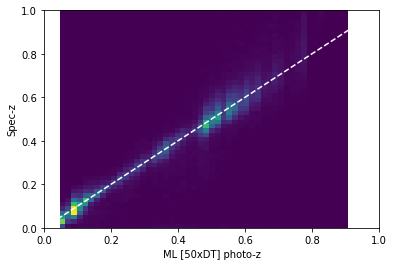

In [19]:
plt.hist2d(pred_test,y_test, bins=50)
plt.xlabel('ML [50xDT] photo-z')
plt.ylabel('Spec-z')
plt.plot([0,1],[0,1],'w--')
plt.xlim([0,1])
plt.ylim([0,1])

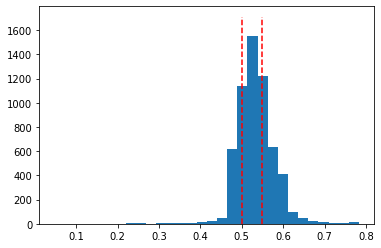

In [20]:
specz=[0.5,0.55]
a=plt.hist(pred_test[(y_test>specz[0]) & (y_test<specz[1])],30)
plt.plot([specz[0],specz[0]],[0,1.1*np.max(a[0])],'r--')
plt.plot([specz[1],specz[1]],[0,1.1*np.max(a[0])],'r--')